# Using largest contour to detect/crop the id/passport

In [8]:
import cv2
import matplotlib.pyplot as plt

def crop_document(input_path, output_path):
    """
    Crops out the largest contour from an image,
    assuming it's the document (ID/passport).
    Saves the cropped image to output_path.
    """

    # Read the image via OpenCV
    original = cv2.imread(input_path)
    if original is None:
        print(f"Error reading {input_path}")
        return
    
    gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    # Simple threshold or can do Canny edge detection
    thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)[1]
    
    # Find external contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print(f"No contours found in {input_path}")
        return
    
    # Find largest contour by area
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Approximate contour to a polygon
    epsilon = 0.02 * cv2.arcLength(largest_contour, True)
    approx = cv2.approxPolyDP(largest_contour, epsilon, True)
    x, y, w, h = cv2.boundingRect(approx)

    # Crop the region
    cropped = original[y:y+h, x:x+w]

    # Save the cropped image
    cv2.imwrite(output_path, cropped)

Cropped document saved to outputs/sample1_contour_cropped.jpg


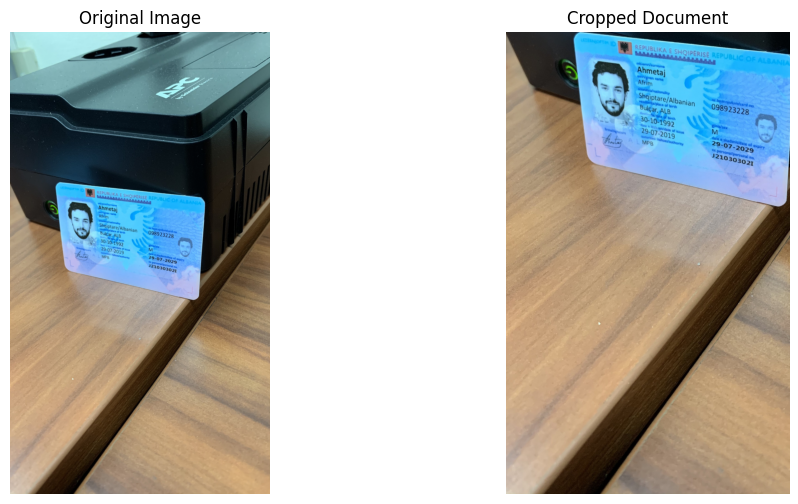

In [9]:
if __name__ == "__main__":
    # Example usage for a single image
    input_img = "../data/samples/sample1.jpg"
    output_img = "outputs/sample1_contour_cropped.jpg"
    crop_document(input_img, output_img)
    print(f"Cropped document saved to {output_img}")

        # Load the images
    img1 = cv2.imread(input_img)
    img2 = cv2.imread(output_img)

    # Convert images from BGR to RGB for correct color representation
    original = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    cropped = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Show the images side by side
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cropped)
    plt.title("Cropped Document")
    plt.axis("off")

    plt.show()

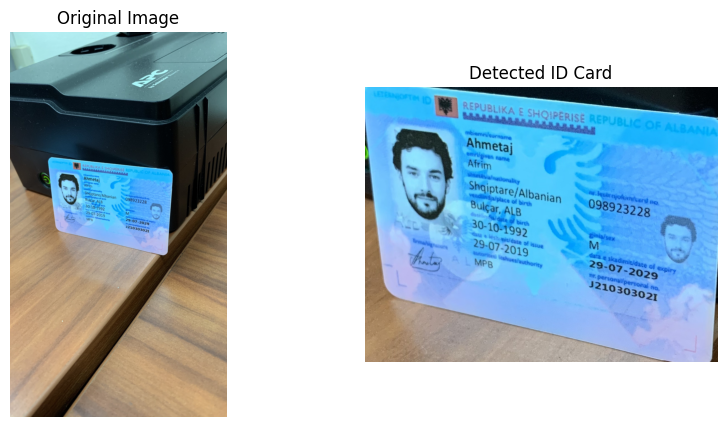

array([[[195, 145,  69],
        [220, 172,  77],
        [241, 193,  98],
        ...,
        [  6,   3,   0],
        [  8,   5,   1],
        [ 10,   7,   3]],

       [[208, 158,  82],
        [240, 192,  97],
        [255, 210, 115],
        ...,
        [  7,   4,   0],
        [ 10,   7,   3],
        [ 10,   7,   3]],

       [[227, 177,  81],
        [255, 210, 102],
        [255, 219, 111],
        ...,
        [  6,   2,   1],
        [  9,   6,   2],
        [  7,   4,   0]],

       ...,

       [[107, 140, 173],
        [107, 140, 173],
        [108, 141, 174],
        ...,
        [ 16,  37,  58],
        [ 15,  36,  57],
        [ 10,  31,  52]],

       [[107, 140, 173],
        [105, 138, 171],
        [105, 138, 171],
        ...,
        [ 14,  35,  56],
        [ 16,  37,  58],
        [ 14,  35,  56]],

       [[103, 137, 167],
        [ 97, 130, 163],
        [ 99, 132, 165],
        ...,
        [ 13,  34,  55],
        [ 13,  34,  55],
        [ 12,  33,  54]]

In [16]:
# Using edge detection to detect/crop the id/passport
import cv2
import matplotlib.pyplot as plt

def detect_id_card(image_path):
    """
    Detects the largest rectangular document in the image (ID card) and extracts it.
    """
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Cannot load {image_path}")
        return None

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to remove noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection (Canny or adaptive thresholding)
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        print("No contours found")
        return None

    # Sort contours by area and take the largest one
    largest_contour = max(contours, key=cv2.contourArea)

    # Approximate contour to a polygon
    epsilon = 0.02 * cv2.arcLength(largest_contour, True)
    approx = cv2.approxPolyDP(largest_contour, epsilon, True)

    # If the detected shape has four corners, it's likely a rectangular ID card
    if len(approx) == 4:
        # Extract the bounding box coordinates
        x, y, w, h = cv2.boundingRect(approx)
        
        # Crop the detected ID card
        cropped_id = image[y:y+h, x:x+w]

        # Display the result in Jupyter Notebook
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(cropped_id, cv2.COLOR_BGR2RGB))
        plt.title("Detected ID Card")
        plt.axis("off")

        plt.show()
        
        return cropped_id
    else:
        print("No ID card detected")
        return None

# Example usage (replace with actual path)
detect_id_card("../data/samples/sample1.jpg")



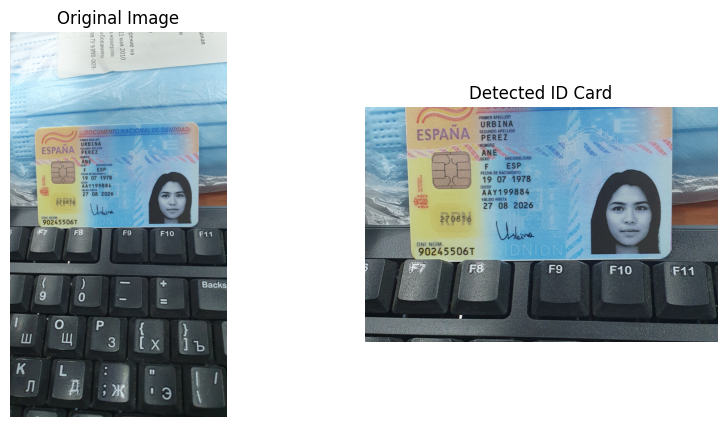

array([[[225, 205, 164],
        [230, 209, 171],
        [232, 211, 173],
        ...,
        [195, 171, 119],
        [194, 170, 118],
        [195, 171, 119]],

       [[219, 199, 158],
        [223, 203, 162],
        [226, 206, 165],
        ...,
        [194, 170, 118],
        [193, 169, 117],
        [192, 168, 116]],

       [[217, 195, 153],
        [222, 200, 158],
        [227, 205, 163],
        ...,
        [195, 171, 119],
        [194, 170, 118],
        [193, 169, 117]],

       ...,

       [[ 54,  53,  49],
        [113, 112, 108],
        [212, 212, 206],
        ...,
        [ 97,  93,  82],
        [ 98,  95,  81],
        [ 94,  91,  76]],

       [[ 81,  80,  76],
        [162, 161, 157],
        [228, 228, 222],
        ...,
        [ 47,  46,  32],
        [ 60,  60,  44],
        [ 67,  67,  51]],

       [[ 88,  86,  85],
        [196, 194, 193],
        [224, 223, 219],
        ...,
        [ 18,  16,   5],
        [ 29,  28,  14],
        [ 30,  30,  14]]

In [17]:
#approach 2

import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_id_card(image_path):
    """
    Detects the largest rectangular document in the image (ID card) and extracts it.
    Even if only part of the ID card is detected, it will crop that region.
    """
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Cannot load {image_path}")
        return None

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to remove noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection (Canny)
    edges = cv2.Canny(blurred, 50, 150)

    # Dilation to strengthen detected edges
    kernel = np.ones((3, 3), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        print("No contours found")
        return None

    # Sort contours by area (largest first)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # Loop through the largest contours and attempt to extract the ID card
    detected_region = None
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Relax condition: Accept polygons with 4 or more points
        if len(approx) >= 4:
            x, y, w, h = cv2.boundingRect(approx)
            detected_region = image[y:y+h, x:x+w]
            break

    if detected_region is None:
        print("No ID card detected")
        return None

    # Display the result
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(detected_region, cv2.COLOR_BGR2RGB))
    plt.title("Detected ID Card")
    plt.axis("off")

    plt.show()

    return detected_region

# Example usage
detect_id_card("../data/samples/sample2.jpg")

# Conclusion

## Why Did This Happen?
#### Complex Background: The ID card is placed on a textured surface with many edges, making it harder to isolate.
#### Lighting Variability: The ID blends into the background due to light reflections, reducing edge contrast.
#### Contour-Based Limitations: While aspect ratio and area filters help, they might not be enough when multiple large objects exist.

There were, of course, a few images, where this relatively simple approach worked well (like the one in the bottom right corner of the bottom image). But for most of the images, we had to conclude that their colors, lightning, shadows, blur, and other conditions were so versatile, that one simple image processing algorithm can’t cover it all.

# Using face as a reference

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

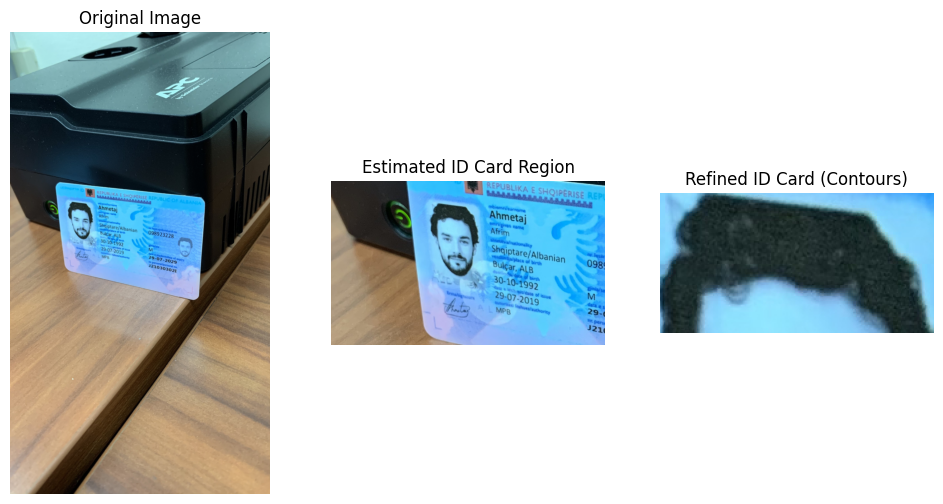

In [3]:
def detect_face_and_smart_extract_id(image_path):
    """
    Detects a face in the ID card and intelligently estimates the full ID card using learned proportions.
    Then applies contour refinement for better accuracy.
    """
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Cannot load {image_path}")
        return None

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("No face detected.")
        return None

    # Assuming the ID card has one face, take the first detected face
    (x, y, w, h) = faces[0]

    # **Smart Bounding Box Expansion Based on Empirical ID Card Layouts**
    id_x1 = max(x - int(2.0 * w), 0)
    id_y1 = max(y - int(0.8 * h), 0)
    id_x2 = min(x + int(3.5 * w), image.shape[1])
    id_y2 = min(y + int(2.5 * h), image.shape[0])

    # Extract the estimated ID card region
    estimated_id_card = image[id_y1:id_y2, id_x1:id_x2]

    # Convert extracted region to grayscale for contour detection
    gray_estimated = cv2.cvtColor(estimated_id_card, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray_estimated, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter for largest rectangular contour
    best_contour = None
    max_area = 0
    for contour in contours:
        x_c, y_c, w_c, h_c = cv2.boundingRect(contour)
        aspect_ratio = w_c / float(h_c)
        area = w_c * h_c

        # Ensure a rectangular shape with reasonable aspect ratio
        if 1.4 < aspect_ratio < 2.2 and area > max_area:
            max_area = area
            best_contour = (x_c, y_c, w_c, h_c)

    # If a valid document shape is detected, refine the crop
    if best_contour:
        x_c, y_c, w_c, h_c = best_contour
        detected_id = estimated_id_card[y_c:y_c+h_c, x_c:x_c+w_c]
    else:
        # If no contour detected, use estimated bounding box
        detected_id = estimated_id_card

    # Display the results
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(estimated_id_card, cv2.COLOR_BGR2RGB))
    plt.title("Estimated ID Card Region")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(detected_id, cv2.COLOR_BGR2RGB))
    plt.title("Refined ID Card (Contours)")
    plt.axis("off")

    plt.show()

    return detected_id

# Run the improved smart extraction on the uploaded image
detected_id_smart = detect_face_and_smart_extract_id("../data/samples/sample1.jpg")
